In [1]:
# =============================================================================
# Cell 1: Import Libraries
# =============================================================================

import pandas as pd
import numpy as np
import pickle
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from textblob import TextBlob
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# =============================================================================
# Cell 2: Load Data and Models
# =============================================================================

# Load original data
df = pd.read_csv('../src/data/raw/temu_reviews.csv')

# Load topic modeling results
with open('../src/models/topic_modeling_results.pkl', 'rb') as f:
    topic_results = pickle.load(f)

# Load customer classification results
with open('../src/models/customer_classification_results.pkl', 'rb') as f:
    customer_results = pickle.load(f)

# Load processed data
with open('../src/models/processed_data.pkl', 'rb') as f:
    processed_data = pickle.load(f) 

print("Data and models loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Prepare data
df['ReviewText'] = df['ReviewText'].fillna('')
df['ReviewTitle'] = df['ReviewTitle'].fillna('')
df['CombinedText'] = df['ReviewTitle'] + ' ' + df['ReviewText']

Data and models loaded successfully!
Dataset shape: (13855, 11)


In [4]:
# =============================================================================
# Cell 3: Response Template System
# =============================================================================

print("\n" + "="*50)
print("RESPONSE TEMPLATE SYSTEM")
print("="*50)

# Why use template-based responses?
print("Why use template-based responses:")
print("1. Ensures consistent customer service quality")
print("2. Faster response times for common issues")
print("3. Maintains professional tone")
print("4. Can be customized based on customer type and topic")

# Define response templates for different topics and customer types
response_templates = {
    # Templates by topic
    'shipping_delivery': {
        'positive': "Thank you for your positive feedback about our delivery service! We're delighted that your order arrived as expected. We appreciate your business and look forward to serving you again.",
        'negative': "We sincerely apologize for the delivery issues you experienced. This is not the standard we strive for. We are investigating this matter and will work to improve our delivery process. Please contact our customer service team for immediate assistance.",
        'neutral': "Thank you for your feedback regarding our delivery service. We value your input and are continuously working to improve our shipping processes. If you have any specific concerns, please don't hesitate to reach out."
    },
    
    'product_quality': {
        'positive': "We're thrilled to hear that you're satisfied with the quality of your purchase! Your positive feedback motivates us to maintain our high standards. Thank you for choosing us!",
        'negative': "We deeply regret that the product quality did not meet your expectations. Quality is our top priority, and we take your feedback seriously. Please contact our support team so we can resolve this issue promptly.",
        'neutral': "Thank you for your feedback about our product quality. We continuously work to improve our products and appreciate your honest review. If you have specific suggestions, we'd love to hear them."
    },
    
    'customer_service': {
        'positive': "We're delighted to hear about your positive experience with our customer service team! Providing excellent service is our commitment, and we're glad we met your expectations.",
        'negative': "We sincerely apologize for the poor customer service experience. This is unacceptable and we will address this immediately with our team. Please contact our manager directly for a prompt resolution.",
        'neutral': "Thank you for your feedback about our customer service. We value your input and are committed to providing the best possible support. We'll review your comments with our team."
    },
    
    'pricing_value': {
        'positive': "We're happy to hear that you found great value in your purchase! We strive to offer competitive prices while maintaining quality. Thank you for your business!",
        'negative': "We understand your concerns about pricing and value. We appreciate your feedback and will review our pricing structure. Please contact us to discuss your specific concerns.",
        'neutral': "Thank you for your feedback regarding our pricing. We work hard to provide fair value for our customers and appreciate your honest assessment."
    },
    
    'general': {
        'positive': "Thank you for your positive review! We're delighted that you had a great experience with us. We appreciate your business and look forward to serving you again.",
        'negative': "We apologize for any inconvenience you experienced. Customer satisfaction is our top priority, and we want to make this right. Please contact our support team for immediate assistance.",
        'neutral': "Thank you for taking the time to share your feedback. We value all customer input and use it to improve our services. If you have any questions, please don't hesitate to reach out."
    }
}

print("Response templates created successfully!")


RESPONSE TEMPLATE SYSTEM
Why use template-based responses:
1. Ensures consistent customer service quality
2. Faster response times for common issues
3. Maintains professional tone
4. Can be customized based on customer type and topic
Response templates created successfully!


In [5]:
# =============================================================================
# Cell 4: Topic Classification for Reviews
# =============================================================================

print("\n" + "="*50)
print("TOPIC CLASSIFICATION")
print("="*50)

# Why classify topics?
print("Why classify review topics:")
print("1. Choose appropriate response template")
print("2. Route to correct department")
print("3. Identify common issues")
print("4. Improve customer service efficiency")

def classify_review_topic(text):
    """
    Classify review topic based on keywords
    Simple but effective approach for template selection
    """
    text_lower = text.lower()
    
    # Shipping/Delivery keywords
    shipping_keywords = ['delivery', 'shipping', 'arrived', 'package', 'delayed', 'fast', 'slow', 'received']
    
    # Product Quality keywords
    quality_keywords = ['quality', 'material', 'broken', 'cheap', 'good', 'bad', 'defective', 'size', 'fit']
    
    # Customer Service keywords
    service_keywords = ['service', 'support', 'help', 'staff', 'representative', 'chat', 'response', 'rude', 'helpful']
    
    # Pricing keywords
    pricing_keywords = ['price', 'expensive', 'cheap', 'value', 'money', 'cost', 'worth', 'overpriced']
    
    # Count keyword matches
    shipping_score = sum(1 for keyword in shipping_keywords if keyword in text_lower)
    quality_score = sum(1 for keyword in quality_keywords if keyword in text_lower)
    service_score = sum(1 for keyword in service_keywords if keyword in text_lower)
    pricing_score = sum(1 for keyword in pricing_keywords if keyword in text_lower)
    
    # Determine topic with highest score
    scores = {
        'shipping_delivery': shipping_score,
        'product_quality': quality_score,
        'customer_service': service_score,
        'pricing_value': pricing_score
    }
    
    max_topic = max(scores, key=scores.get)
    
    # Return general if no clear topic
    if scores[max_topic] == 0:
        return 'general'
    
    return max_topic

# Test topic classification
sample_reviews = [
    "The delivery was very fast and the package arrived in perfect condition",
    "The product quality is terrible, it broke after one day",
    "Customer service was very helpful and solved my problem quickly",
    "Too expensive for what you get, not worth the money"
]

print("\nTopic classification examples:")
for i, review in enumerate(sample_reviews, 1):
    topic = classify_review_topic(review)
    print(f"Review {i}: {topic}")
    print(f"Text: {review[:50]}...")
    print()



TOPIC CLASSIFICATION
Why classify review topics:
1. Choose appropriate response template
2. Route to correct department
3. Identify common issues
4. Improve customer service efficiency

Topic classification examples:
Review 1: shipping_delivery
Text: The delivery was very fast and the package arrived...

Review 2: product_quality
Text: The product quality is terrible, it broke after on...

Review 3: customer_service
Text: Customer service was very helpful and solved my pr...

Review 4: pricing_value
Text: Too expensive for what you get, not worth the mone...



In [6]:
# =============================================================================
# Cell 5: Sentiment Analysis for Template Selection
# =============================================================================

print("\n" + "="*50)
print("SENTIMENT ANALYSIS")
print("="*50)

# Why analyze sentiment?
print("Why analyze sentiment:")
print("1. Choose positive/negative/neutral response template")
print("2. Adjust response tone appropriately")
print("3. Prioritize negative reviews for immediate attention")
print("4. Measure customer satisfaction trends")

from textblob import TextBlob

def analyze_sentiment(text):
    """
    Analyze sentiment to choose appropriate response template
    Returns: positive, negative, or neutral
    """
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Test sentiment analysis
print("\nSentiment analysis examples:")
for i, review in enumerate(sample_reviews, 1):
    sentiment = analyze_sentiment(review)
    print(f"Review {i}: {sentiment}")
    print(f"Text: {review[:50]}...")
    print()


SENTIMENT ANALYSIS
Why analyze sentiment:
1. Choose positive/negative/neutral response template
2. Adjust response tone appropriately
3. Prioritize negative reviews for immediate attention
4. Measure customer satisfaction trends

Sentiment analysis examples:
Review 1: positive
Text: The delivery was very fast and the package arrived...

Review 2: negative
Text: The product quality is terrible, it broke after on...

Review 3: positive
Text: Customer service was very helpful and solved my pr...

Review 4: negative
Text: Too expensive for what you get, not worth the mone...



In [7]:
# =============================================================================
# Cell 6: Reply Suggestion System
# =============================================================================

print("\n" + "="*50)
print("REPLY SUGGESTION SYSTEM")
print("="*50)

# Why automated reply suggestions?
print("Why automated reply suggestions:")
print("1. Reduce response time for customer service")
print("2. Ensure consistent quality responses")
print("3. Help new customer service representatives")
print("4. Scale customer service operations")

def generate_reply_suggestion(review_text, customer_type=None):
    """
    Generate reply suggestion based on topic and sentiment
    """
    # Classify topic and sentiment
    topic = classify_review_topic(review_text)
    sentiment = analyze_sentiment(review_text)
    
    # Get base template
    base_template = response_templates[topic][sentiment]
    
    # Customize based on customer type if available
    if customer_type == 'frequent_reviewer':
        prefix = "As a valued frequent customer, "
    elif customer_type == 'loyal_customer':
        prefix = "We appreciate your continued loyalty. "
    else:
        prefix = ""
    
    # Add personalization
    personalized_reply = prefix + base_template
    
    return {
        'topic': topic,
        'sentiment': sentiment,
        'customer_type': customer_type,
        'suggested_reply': personalized_reply
    }

# Test reply generation
print("\nReply suggestion examples:")
for i, review in enumerate(sample_reviews, 1):
    suggestion = generate_reply_suggestion(review)
    print(f"Review {i}:")
    print(f"Topic: {suggestion['topic']}")
    print(f"Sentiment: {suggestion['sentiment']}")
    print(f"Suggested Reply: {suggestion['suggested_reply'][:100]}...")
    print("-" * 50)



REPLY SUGGESTION SYSTEM
Why automated reply suggestions:
1. Reduce response time for customer service
2. Ensure consistent quality responses
3. Help new customer service representatives
4. Scale customer service operations

Reply suggestion examples:
Review 1:
Topic: shipping_delivery
Sentiment: positive
Suggested Reply: Thank you for your positive feedback about our delivery service! We're delighted that your order arr...
--------------------------------------------------
Review 2:
Topic: product_quality
Sentiment: negative
Suggested Reply: We deeply regret that the product quality did not meet your expectations. Quality is our top priorit...
--------------------------------------------------
Review 3:
Topic: customer_service
Sentiment: positive
Suggested Reply: We're delighted to hear about your positive experience with our customer service team! Providing exc...
--------------------------------------------------
Review 4:
Topic: pricing_value
Sentiment: negative
Suggested Reply: We

In [8]:
# =============================================================================
# Cell 7: Batch Processing for All Reviews
# =============================================================================

print("\n" + "="*50)
print("BATCH PROCESSING")
print("="*50)

# Why batch processing?
print("Why process all reviews at once:")
print("1. Generate replies for all existing reviews")
print("2. Analyze response patterns")
print("3. Quality control and template optimization")
print("4. Training data for customer service team")

# Process subset of reviews for demonstration
sample_size = 100
sample_df = df.sample(n=sample_size, random_state=42)

print(f"\nProcessing {sample_size} reviews...")

# Generate suggestions for sample
suggestions = []
for idx, row in sample_df.iterrows():
    review_text = row['CombinedText']
    suggestion = generate_reply_suggestion(review_text)
    suggestion['review_id'] = idx
    suggestion['original_rating'] = row['ReviewRating']
    suggestions.append(suggestion)

# Convert to DataFrame
suggestions_df = pd.DataFrame(suggestions)
print(f"Generated {len(suggestions_df)} reply suggestions")


BATCH PROCESSING
Why process all reviews at once:
1. Generate replies for all existing reviews
2. Analyze response patterns
3. Quality control and template optimization
4. Training data for customer service team

Processing 100 reviews...
Generated 100 reply suggestions



SUGGESTION ANALYSIS
Topic distribution:
topic
product_quality      31
shipping_delivery    29
general              17
pricing_value        12
customer_service     11
Name: count, dtype: int64

Sentiment distribution:
sentiment
positive    43
neutral     41
negative    16
Name: count, dtype: int64


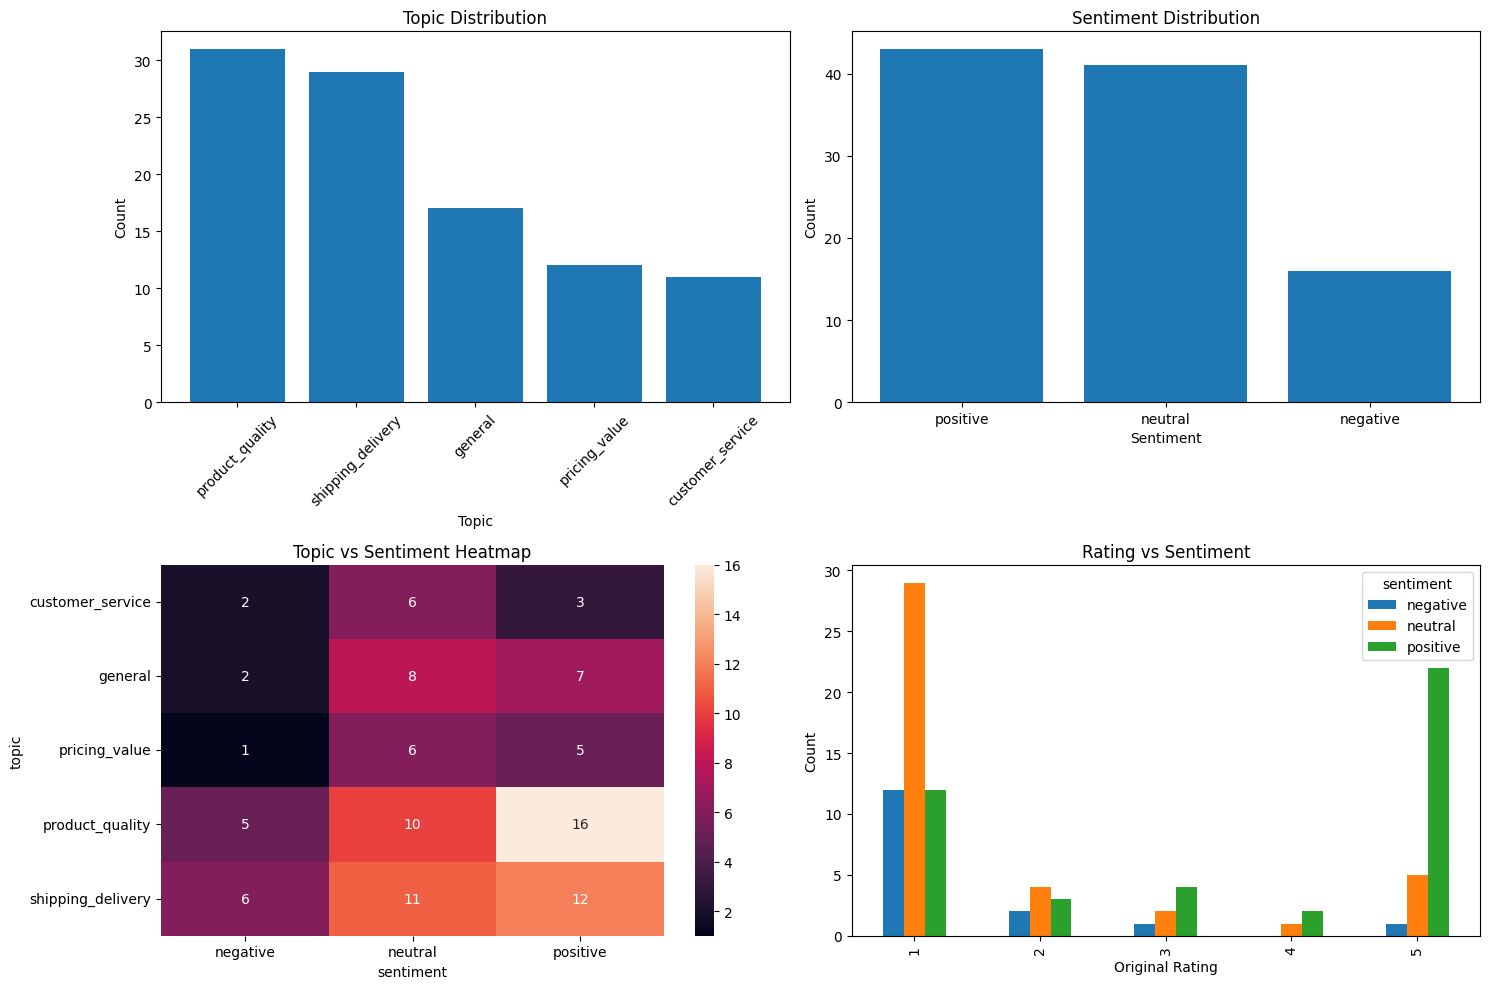

In [9]:
# =============================================================================
# Cell 8: Analysis of Generated Suggestions
# =============================================================================

print("\n" + "="*50)
print("SUGGESTION ANALYSIS")
print("="*50)

# Analyze topic distribution
topic_counts = suggestions_df['topic'].value_counts()
print("Topic distribution:")
print(topic_counts)

# Analyze sentiment distribution
sentiment_counts = suggestions_df['sentiment'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Topic distribution
axes[0, 0].bar(topic_counts.index, topic_counts.values)
axes[0, 0].set_title('Topic Distribution')
axes[0, 0].set_xlabel('Topic')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Sentiment distribution
axes[0, 1].bar(sentiment_counts.index, sentiment_counts.values)
axes[0, 1].set_title('Sentiment Distribution')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Count')

# Topic vs Sentiment heatmap
topic_sentiment = pd.crosstab(suggestions_df['topic'], suggestions_df['sentiment'])
sns.heatmap(topic_sentiment, annot=True, fmt='d', ax=axes[1, 0])
axes[1, 0].set_title('Topic vs Sentiment Heatmap')

# Rating vs Sentiment
rating_sentiment = suggestions_df.groupby(['original_rating', 'sentiment']).size().unstack(fill_value=0)
rating_sentiment.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Rating vs Sentiment')
axes[1, 1].set_xlabel('Original Rating')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
# =============================================================================
# Cell 9: Quality Metrics and Evaluation
# =============================================================================

print("\n" + "="*50)
print("QUALITY METRICS")
print("="*50)

# Why measure quality?
print("Why measure suggestion quality:")
print("1. Ensure appropriate responses")
print("2. Identify improvement opportunities")
print("3. Monitor system performance")
print("4. Build confidence in automated system")

def evaluate_suggestion_quality(suggestions_df):
    """
    Evaluate quality of generated suggestions
    """
    quality_metrics = {}
    
    # Template coverage
    template_usage = suggestions_df['topic'].value_counts()
    quality_metrics['template_coverage'] = len(template_usage) / len(response_templates)
    
    # Sentiment accuracy (comparing with ratings)
    sentiment_accuracy = 0
    for _, row in suggestions_df.iterrows():
        rating = row['original_rating']
        sentiment = row['sentiment']
        
        if rating >= 4 and sentiment == 'positive':
            sentiment_accuracy += 1
        elif rating <= 2 and sentiment == 'negative':
            sentiment_accuracy += 1
        elif rating == 3 and sentiment == 'neutral':
            sentiment_accuracy += 1
    
    quality_metrics['sentiment_accuracy'] = sentiment_accuracy / len(suggestions_df)
    
    # Response length distribution
    response_lengths = [len(sugg['suggested_reply']) for sugg in suggestions]
    quality_metrics['avg_response_length'] = np.mean(response_lengths)
    quality_metrics['response_length_std'] = np.std(response_lengths)
    
    return quality_metrics

# Evaluate quality
quality_results = evaluate_suggestion_quality(suggestions_df)
print("Quality Metrics:")
for metric, value in quality_results.items():
    print(f"{metric}: {value:.3f}")


QUALITY METRICS
Why measure suggestion quality:
1. Ensure appropriate responses
2. Identify improvement opportunities
3. Monitor system performance
4. Build confidence in automated system
Quality Metrics:
template_coverage: 1.000
sentiment_accuracy: 0.400
avg_response_length: 185.190
response_length_std: 24.760


In [11]:
# =============================================================================
# Cell 10: Save Results and Export System
# =============================================================================

print("\n" + "="*50)
print("SAVE RESULTS")
print("="*50)

# Why save results?
print("Why save suggestion system:")
print("1. Use in production customer service")
print("2. Continue improving templates")
print("3. Train customer service team")
print("4. Integrate with other systems")

# Save complete suggestion system
suggestion_system = {
    'templates': response_templates,
    'quality_metrics': quality_results,
    'sample_suggestions': suggestions_df.to_dict('records')
}

# Save to pickle file
with open('../src/models/reply_suggestion_system.pkl', 'wb') as f:
    pickle.dump(suggestion_system, f)

# Save suggestions to CSV
suggestions_df.to_csv('../src/results/reply_suggestions.csv', index=False)

print("Reply suggestion system saved successfully!")
print("Files created:")
print("- src/models/reply_suggestion_system.pkl")
print("- src/results/reply_suggestions.csv")


SAVE RESULTS
Why save suggestion system:
1. Use in production customer service
2. Continue improving templates
3. Train customer service team
4. Integrate with other systems
Reply suggestion system saved successfully!
Files created:
- src/models/reply_suggestion_system.pkl
- src/results/reply_suggestions.csv


In [1]:
# =============================================================================
# Cell 11: Usage Example and Documentation
# =============================================================================

print("\n" + "="*50)
print("USAGE EXAMPLE")
print("="*50)

# Example usage for new review
def process_new_review(review_text):
    """
    Complete workflow for processing a new review
    """
    print(f"Processing review: {review_text[:50]}...")
    
    # Generate suggestion
    suggestion = generate_reply_suggestion(review_text)
    
    # Display results
    print(f"Topic: {suggestion['topic']}")
    print(f"Sentiment: {suggestion['sentiment']}")
    print(f"Suggested Reply:")
    print(suggestion['suggested_reply'])
    print("-" * 50)
    
    return suggestion

# Test with new examples
new_reviews = [
    "Great product! Fast delivery and excellent quality. Will buy again!",
    "Terrible experience. Product broke immediately and customer service was unhelpful.",
    "Average product for the price. Nothing special but not bad either."
]

print("Processing new reviews:")
for review in new_reviews:
    process_new_review(review)




USAGE EXAMPLE
Processing new reviews:
Processing review: Great product! Fast delivery and excellent quality...


NameError: name 'generate_reply_suggestion' is not defined